## This notebook tests the 4 trained models on a new dataset.
## https://www.kaggle.com/datasets/danrasband/asl-alphabet-test

In [1]:
import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Desktop\ENEL_final_project

C:\Users\nehag\OneDrive - University of Calgary\Desktop\ENEL_final_project


In [3]:
model = keras.models.load_model('Sequential-LowWeight.h5')

In [63]:
testfile = 'archive_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

In [35]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile1,
    validation_split=0,
    seed=42,
    image_size=(32,32),
)

Found 870 files belonging to 29 classes.


In [36]:
class_names = test_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


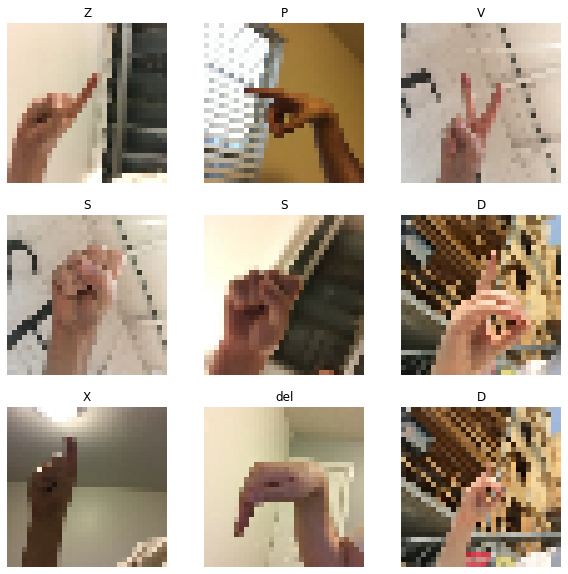

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [75]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile1):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile1 + "/" + folder):
            temp_img = cv2.imread(testfile1 + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

In [94]:
x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 870 images for testing, test data shape = (870, 32, 32, 3)


In [95]:
print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

test shape  ->  (870, 32, 32, 3)
labels shape ->  (870, 29)
len labels    ->  870


In [107]:
labels2 = np.array(labels)

# Low weight sequential

In [90]:
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(x_test, labels2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 0s 3ms/step - loss: 15.4925 - accuracy: 0.0345
Test accuracy: 0.03448275849223137
Test loss: 15.492470741271973


# High weight sequential

In [100]:
model1 = keras.models.load_model('Sequential-HighWeight.h5')

In [101]:
def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 0s 11ms/step - loss: 16.3739 - accuracy: 0.1954
Test accuracy: 0.19540229439735413
Test loss: 16.373889923095703


# DenseNet121

In [103]:
model2 = keras.models.load_model('ASL_DenseNet121.h5')

In [104]:
def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 3s 58ms/step - loss: 6.4499 - accuracy: 0.1770
Test accuracy: 0.17701148986816406
Test loss: 6.449873924255371


# MobileNet

In [105]:
model3 = keras.models.load_model('ASL_MobileNet.h5')

In [106]:
def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 1s 14ms/step - loss: 7.4719 - accuracy: 0.2161
Test accuracy: 0.21609196066856384
Test loss: 7.471902370452881
